In [3]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
X_train= p.read_csv('in_chemico_x_train.csv')
X_test= p.read_csv('in_chemico_x_test.csv')
y_train = p.read_csv('in_chemico_y_train.csv')
y_test = p.read_csv('in_chemico_y_test.csv')



In [5]:

X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled.shape

(129, 134)

# SelectKBest AdaBoost (roc_auc)


=== Testing k = 20 features ===
Best params: {'n_estimators': 200, 'learning_rate': 0.3, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.744

=== Testing k = 30 features ===
Best params: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.731

=== Testing k = 40 features ===
Best params: {'n_estimators': 200, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}
Accuracy: 0.758 | ROC-AUC: 0.800

=== Testing k = 50 features ===
Best params: {'n_estimators': 200, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.576 | ROC-AUC: 0.717

=== Testing k = 60 features ===
Best params: {'n_estimators': 300, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}
Accuracy: 0.667 | ROC-AUC: 0.759

=== Testing k = 70 features ===
Best params: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.739

=== Testing k = 80 features ===
Best params: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}


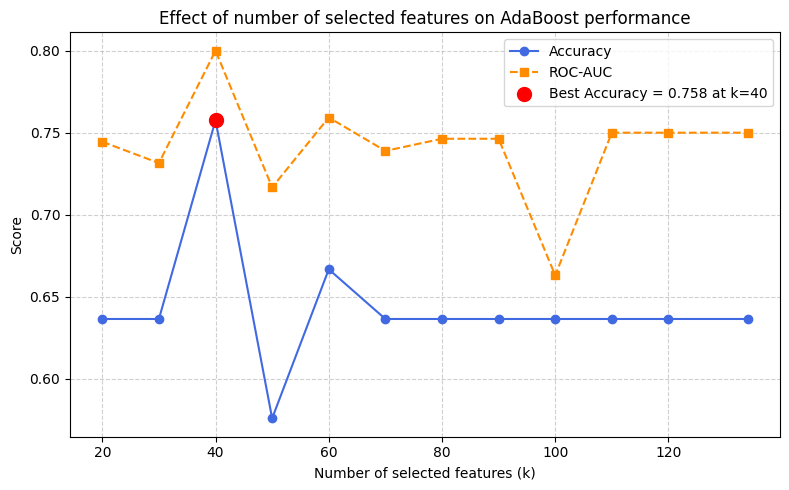


Best accuracy = 0.758 at k = 40


In [12]:
import warnings
warnings.filterwarnings("ignore")

param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'algorithm': [ 'SAMME.R']
}

k_values = [20, 30,40,50,60,70,80,90, 100, 110,120,134]
results = []

for k in k_values:
    print(f"\n=== Testing k = {k} features ===")
    
    selector = SelectKBest(f_classif, k=k)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)
    
    ada = AdaBoostClassifier(random_state=42)
    search = RandomizedSearchCV(
        estimator=ada,
        param_distributions=param_dist,
        n_iter=20,
        scoring='roc_auc',
        cv=3,
        random_state=42,
        n_jobs=1,
        verbose=0
    )
    search.fit(X_train_sel, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_sel)
    y_prob = best_model.predict_proba(X_test_sel)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))
    
    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")

results = np.array(results)
feature_counts = results[:, 0]
accuracies = results[:, 1]
auc_scores = results[:, 2]

best_index = np.argmax(accuracies)
best_k = int(feature_counts[best_index])
best_acc = accuracies[best_index]

plt.figure(figsize=(8,5))
plt.plot(feature_counts, accuracies, 'o-', color='royalblue', label='Accuracy')
plt.plot(feature_counts, auc_scores, 's--', color='darkorange', label='ROC-AUC')

plt.scatter(best_k, best_acc, color='red', s=100, zorder=5,
            label=f'Best Accuracy = {best_acc:.3f} at k={best_k}')

plt.title('Effect of number of selected features on AdaBoost performance')
plt.xlabel('Number of selected features (k)')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nBest accuracy = {best_acc:.3f} at k = {best_k}")


# SelectKBest AdaBoost (accuracy)


=== Testing k = 20 features ===
Best params: {'n_estimators': 200, 'learning_rate': 0.3, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.744

=== Testing k = 30 features ===
Best params: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.731

=== Testing k = 40 features ===
Best params: {'n_estimators': 300, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}
Accuracy: 0.788 | ROC-AUC: 0.781

=== Testing k = 50 features ===
Best params: {'n_estimators': 400, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Accuracy: 0.667 | ROC-AUC: 0.741

=== Testing k = 60 features ===
Best params: {'n_estimators': 400, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.711

=== Testing k = 70 features ===
Best params: {'n_estimators': 200, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.576 | ROC-AUC: 0.707

=== Testing k = 80 features ===
Best params: {'n_estimators': 400, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
A

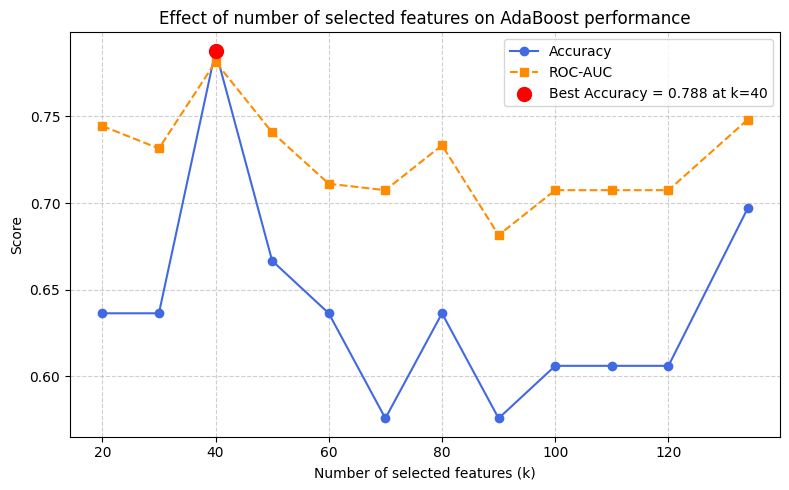


Best accuracy = 0.788 at k = 40


In [13]:
import warnings
warnings.filterwarnings("ignore")

param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'algorithm': [ 'SAMME.R']
}

k_values = [20, 30,40,50,60,70,80,90, 100, 110,120, 134]
results = []

for k in k_values:
    print(f"\n=== Testing k = {k} features ===")
    
    selector = SelectKBest(f_classif, k=k)
    X_train_sel = selector.fit_transform(X_train_scaled, y_train)
    X_test_sel = selector.transform(X_test_scaled)
    
    ada = AdaBoostClassifier(random_state=42)
    search = RandomizedSearchCV(
        estimator=ada,
        param_distributions=param_dist,
        n_iter=20,
        scoring='accuracy',
        cv=3,
        random_state=42,
        n_jobs=1,
        verbose=0
    )
    search.fit(X_train_sel, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_sel)
    y_prob = best_model.predict_proba(X_test_sel)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))
    
    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")

results = np.array(results)
feature_counts = results[:, 0]
accuracies = results[:, 1]
auc_scores = results[:, 2]

best_index = np.argmax(accuracies)
best_k = int(feature_counts[best_index])
best_acc = accuracies[best_index]

plt.figure(figsize=(8,5))
plt.plot(feature_counts, accuracies, 'o-', color='royalblue', label='Accuracy')
plt.plot(feature_counts, auc_scores, 's--', color='darkorange', label='ROC-AUC')

plt.scatter(best_k, best_acc, color='red', s=100, zorder=5,
            label=f'Best Accuracy = {best_acc:.3f} at k={best_k}')

plt.title('Effect of number of selected features on AdaBoost performance')
plt.xlabel('Number of selected features (k)')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nBest accuracy = {best_acc:.3f} at k = {best_k}")


# SelectKBest AdaBoost (roc_auc) with depth=2


=== Testing k = 20 features ===
Best params: {'n_estimators': 300, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.727 | ROC-AUC: 0.793

=== Testing k = 30 features ===
Best params: {'n_estimators': 200, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.758 | ROC-AUC: 0.770

=== Testing k = 40 features ===
Best params: {'n_estimators': 400, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}
Accuracy: 0.758 | ROC-AUC: 0.774

=== Testing k = 50 features ===
Best params: {'n_estimators': 400, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Accuracy: 0.667 | ROC-AUC: 0.770

=== Testing k = 60 features ===
Best params: {'n_estimators': 300, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Accuracy: 0.758 | ROC-AUC: 0.756

=== Testing k = 70 features ===
Best params: {'n_estimators': 300, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}
Accuracy: 0.697 | ROC-AUC: 0.756

=== Testing k = 80 features ===
Best params: {'n_estimators': 400, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}

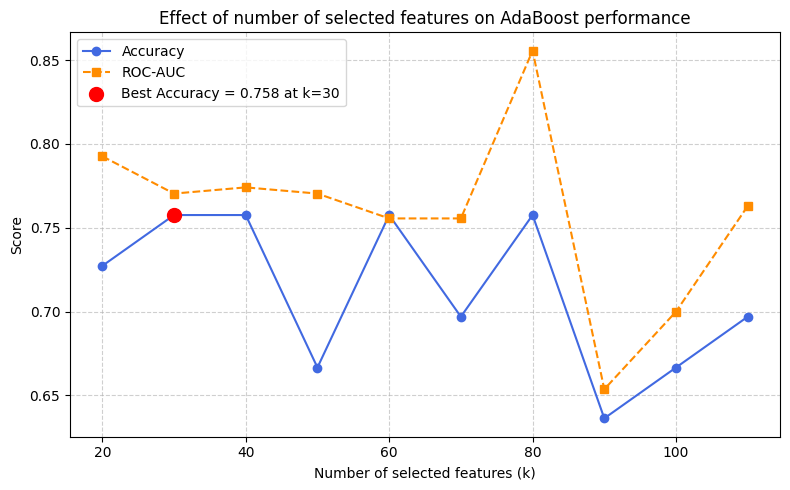


Best accuracy = 0.758 at k = 30


In [ ]:
import warnings
warnings.filterwarnings("ignore")
base_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, random_state=42)
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'algorithm': [ 'SAMME.R']
}

k_values =  list(range(20, 120, 10))
results = []

for k in k_values:
    print(f"\n=== Testing k = {k} features ===")
    
    selector = SelectKBest(f_classif, k=k)
    X_train_sel = selector.fit_transform(X_train_scaled, y_train)
    X_test_sel = selector.transform(X_test_scaled)
    
    ada = AdaBoostClassifier(estimator=base_tree,random_state=42)
    search = RandomizedSearchCV(
        estimator=ada,
        param_distributions=param_dist,
        n_iter=20,
        scoring='roc_auc',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    search.fit(X_train_sel, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_sel)
    y_prob = best_model.predict_proba(X_test_sel)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))
    
    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")

results = np.array(results)
feature_counts = results[:, 0]
accuracies = results[:, 1]
auc_scores = results[:, 2]

best_index = np.argmax(accuracies)
best_k = int(feature_counts[best_index])
best_acc = accuracies[best_index]

plt.figure(figsize=(8,5))
plt.plot(feature_counts, accuracies, 'o-', color='royalblue', label='Accuracy')
plt.plot(feature_counts, auc_scores, 's--', color='darkorange', label='ROC-AUC')

plt.scatter(best_k, best_acc, color='red', s=100, zorder=5,
            label=f'Best Accuracy = {best_acc:.3f} at k={best_k}')

plt.title('Effect of number of selected features on AdaBoost performance')
plt.xlabel('Number of selected features (k)')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nBest accuracy = {best_acc:.3f} at k = {best_k}")


# SelectKBest GradientBoost 


=== Testing k = 20 features ===
Best params: {'subsample': 1.0, 'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.2}
Accuracy: 0.818 | ROC-AUC: 0.781

=== Testing k = 30 features ===
Best params: {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 1, 'learning_rate': 0.01}
Accuracy: 0.636 | ROC-AUC: 0.693

=== Testing k = 40 features ===
Best params: {'subsample': 0.6, 'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.2}
Accuracy: 0.636 | ROC-AUC: 0.719

=== Testing k = 50 features ===
Best params: {'subsample': 1.0, 'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 1, 'learning_rate': 0.01}
Accuracy: 0.606 | ROC-AUC: 0.694

=== Testing k = 60 features ===
Best params: {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 1, 'learning_rate': 0.05}
Accuracy: 0.

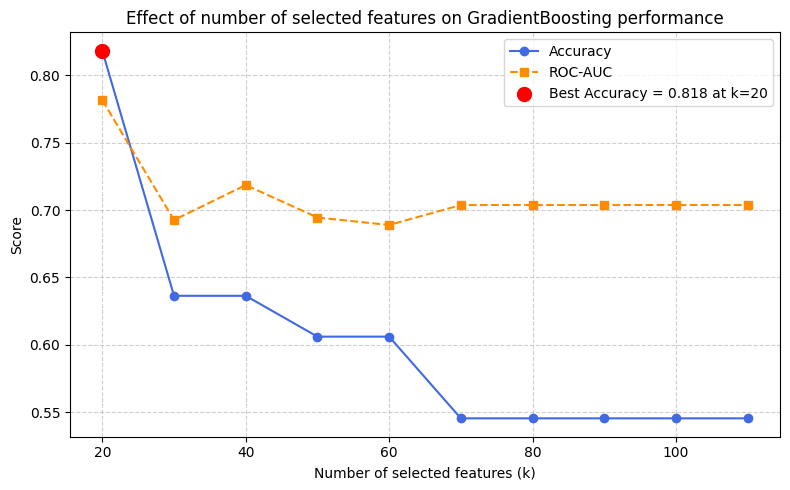


Best accuracy = 0.818 at k = 20


In [21]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

param_dist = {
    'n_estimators': np.arange(50, 300, 50),   
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    
    'max_depth': [1, 2, 3],                     
    'subsample': [0.6, 0.8, 1.0],               
    'min_samples_split': [2, 3,10],             
    'min_samples_leaf': [1, 2, 4]               
}

k_values = list(range(20, 120, 10))
results = []

for k in k_values:
    print(f"\n=== Testing k = {k} features ===")
    
    selector = SelectKBest(f_classif, k=k)
    X_train_sel = selector.fit_transform(X_train_scaled, y_train)
    X_test_sel = selector.transform(X_test_scaled)
    
    gb = GradientBoostingClassifier(random_state=42)
    search = RandomizedSearchCV(
        estimator=gb,
        param_distributions=param_dist,
        n_iter=80,
        scoring='roc_auc',
        cv=3,
        random_state=42,
        n_jobs=1,
        verbose=0
    )
    search.fit(X_train_sel, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_sel)
    y_prob = best_model.predict_proba(X_test_sel)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))
    
    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")

results = np.array(results)
feature_counts = results[:, 0]
accuracies = results[:, 1]
auc_scores = results[:, 2]

best_index = np.argmax(accuracies)
best_k = int(feature_counts[best_index])
best_acc = accuracies[best_index]

plt.figure(figsize=(8,5))
plt.plot(feature_counts, accuracies, 'o-', color='royalblue', label='Accuracy')
plt.plot(feature_counts, auc_scores, 's--', color='darkorange', label='ROC-AUC')

plt.scatter(best_k, best_acc, color='red', s=100, zorder=5,
            label=f'Best Accuracy = {best_acc:.3f} at k={best_k}')

plt.title('Effect of number of selected features on GradientBoosting performance')
plt.xlabel('Number of selected features (k)')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nBest accuracy = {best_acc:.3f} at k = {best_k}")


# Correlation-based feature selection

In [17]:

import pandas as pd
X_train_df = pd.DataFrame(X_train_scaled)
X_test_df = pd.DataFrame(X_test_scaled)

print(f"Features: {X_train_df.shape[1]}")

corr_matrix = X_train_df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

print(f"Delete {len(to_drop)} features > 0.6")

X_train_filtered = X_train_df.drop(to_drop, axis=1)
X_test_filtered = X_test_df.drop(to_drop, axis=1)

print(f"Features after: {X_train_filtered.shape[1]}")
X_train_clean = X_train_filtered.values
X_test_clean = X_test_filtered.values



Features: 134
Delete 96 features > 0.6
Features after: 38


# Correlation-based AdaBoost


=== Testing k = 10 features ===
Best params: {'n_estimators': 150, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.685

=== Testing k = 15 features ===
Best params: {'n_estimators': 50, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.694

=== Testing k = 20 features ===
Best params: {'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Accuracy: 0.606 | ROC-AUC: 0.683

=== Testing k = 25 features ===
Best params: {'n_estimators': 150, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}
Accuracy: 0.576 | ROC-AUC: 0.709

=== Testing k = 30 features ===
Best params: {'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Accuracy: 0.545 | ROC-AUC: 0.646

=== Testing k = 38 features ===
Best params: {'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Accuracy: 0.606 | ROC-AUC: 0.715


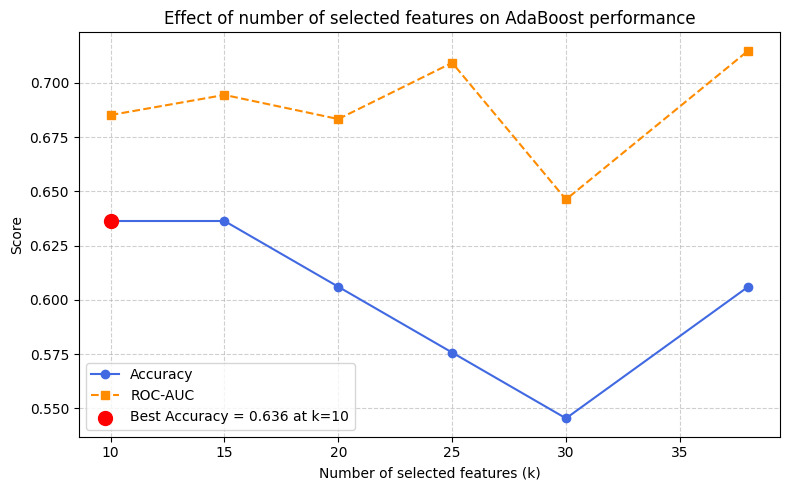


Best accuracy = 0.636 at k = 10


In [24]:
import warnings
warnings.filterwarnings("ignore")

param_dist = {
    'n_estimators': np.arange(50, 250, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'algorithm': ['SAMME.R']
}

k_values = [10,15,20,25,30,38]
results = []

for k in k_values:
    print(f"\n=== Testing k = {k} features ===")
    
    selector = SelectKBest(f_classif, k=k)
    X_train_sel = selector.fit_transform(X_train_clean, y_train)
    X_test_sel = selector.transform(X_test_clean)
    
    ada = AdaBoostClassifier(random_state=42)
    search = RandomizedSearchCV(
        estimator=ada,
        param_distributions=param_dist,
        n_iter=20,
        scoring='roc_auc',
        cv=5,
        random_state=42,
        n_jobs=1,
        verbose=0
    )
    search.fit(X_train_sel, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_sel)
    y_prob = best_model.predict_proba(X_test_sel)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))
    
    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")

results = np.array(results)
feature_counts = results[:, 0]
accuracies = results[:, 1]
auc_scores = results[:, 2]

best_index = np.argmax(accuracies)
best_k = int(feature_counts[best_index])
best_acc = accuracies[best_index]

plt.figure(figsize=(8,5))
plt.plot(feature_counts, accuracies, 'o-', color='royalblue', label='Accuracy')
plt.plot(feature_counts, auc_scores, 's--', color='darkorange', label='ROC-AUC')

plt.scatter(best_k, best_acc, color='red', s=100, zorder=5,
            label=f'Best Accuracy = {best_acc:.3f} at k={best_k}')

plt.title('Effect of number of selected features on AdaBoost performance')
plt.xlabel('Number of selected features (k)')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nBest accuracy = {best_acc:.3f} at k = {best_k}")


# feature_importances_ AdaBoost

In [25]:
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")
base = DecisionTreeClassifier(max_depth=2, min_samples_split=4, random_state=42)
param_dist = {
    'n_estimators': np.arange(100, 300, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'algorithm': [ 'SAMME.R']
}

ada = AdaBoostClassifier(estimator=base,random_state=42)
search = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\nBest params:", search.best_params_)
print(f"Accuracy: {acc:.3f}")
print(f"ROC-AUC: {auc:.3f}")

feature_importances = pd.Series(best_model.feature_importances_)
top_features = feature_importances.sort_values(ascending=False).head(500)

top_features_df = pd.DataFrame({
    "feature_index": top_features.index,
    "importance": top_features.values
})

top_features_df.to_csv("top_features.csv", index=False)
print("\nTop features saved to top_features.csv")
print(top_features_df)


Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best params: {'n_estimators': 200, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}
Accuracy: 0.636
ROC-AUC: 0.722

Top features saved to top_features.csv
     feature_index  importance
0               59    0.092700
1               56    0.089464
2                4    0.083003
3               18    0.058290
4               83    0.055666
..             ...         ...
129             94    0.000000
130             95    0.000000
131              9    0.000000
132             99    0.000000
133            133    0.000000

[134 rows x 2 columns]


In [30]:
import warnings
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

warnings.filterwarnings("ignore")

top_features = pd.read_csv("top_features.csv")
top_features = top_features[top_features["importance"] > 0]
top_features = top_features.sort_values("importance", ascending=False).reset_index(drop=True)
print(f"Total available features: {len(top_features)}")

k_values = list(range(10, len(top_features) + 1, 10))

results = []

param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'algorithm': ['SAMME.R']
}

for k in k_values:
    print(f"\n=== Testing k = {k} features ===")
    selected = top_features.head(k)
    top_indices = selected["feature_index"].astype(int).tolist()

    X_train_k = X_train.iloc[:, top_indices]
    X_test_k = X_test.iloc[:, top_indices]


    ada = AdaBoostClassifier(random_state=42)
    search = RandomizedSearchCV(
        estimator=ada,
        param_distributions=param_dist,
        n_iter=20,
        scoring='roc_auc',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    search.fit(X_train_k, y_train)

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_k)
    y_prob = best_model.predict_proba(X_test_k)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")

    results.append((k, acc, auc))

results_df = pd.DataFrame(results, columns=["k_features", "accuracy", "roc_auc"])
results_df.to_csv("ada_results_by_k.csv", index=False)

print("\n=== Summary ===")
print(results_df)


Total available features: 80

=== Testing k = 10 features ===
Best params: {'n_estimators': 250, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.715

=== Testing k = 20 features ===
Best params: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.545 | ROC-AUC: 0.700

=== Testing k = 30 features ===
Best params: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.576 | ROC-AUC: 0.704

=== Testing k = 40 features ===
Best params: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.717

=== Testing k = 50 features ===
Best params: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.713

=== Testing k = 60 features ===
Best params: {'n_estimators': 100, 'learning_rate': 0.01, 'algorithm': 'SAMME.R'}
Accuracy: 0.636 | ROC-AUC: 0.713

=== Testing k = 70 features ===
Best params: {'n_estimators': 100, 'learning_rate'

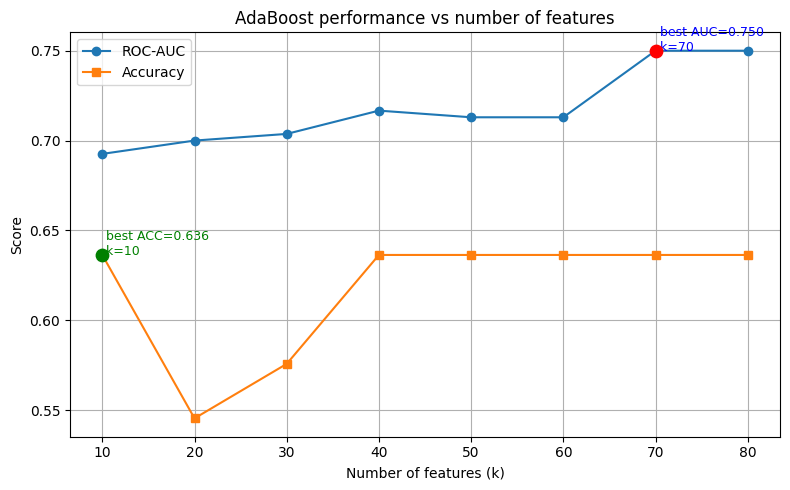

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(results_df["k_features"], results_df["roc_auc"], marker="o", label="ROC-AUC")
plt.plot(results_df["k_features"], results_df["accuracy"], marker="s", label="Accuracy")


best_auc_k = results_df.loc[results_df["roc_auc"].idxmax(), "k_features"]
best_acc_k = results_df.loc[results_df["accuracy"].idxmax(), "k_features"]
best_auc = results_df["roc_auc"].max()
best_acc = results_df["accuracy"].max()

plt.scatter(best_auc_k, best_auc, color="red", s=80, zorder=5)
plt.scatter(best_acc_k, best_acc, color="green", s=80, zorder=5)
plt.text(best_auc_k, best_auc, f" best AUC={best_auc:.3f}\n k={int(best_auc_k)}", color="blue", fontsize=9)
plt.text(best_acc_k, best_acc, f" best ACC={best_acc:.3f}\n k={int(best_acc_k)}", color="green", fontsize=9)

plt.xlabel("Number of features (k)")
plt.ylabel("Score")
plt.title("AdaBoost performance vs number of features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# feature_importances_ GradientBoost

In [28]:
import warnings
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

warnings.filterwarnings("ignore")

param_dist = {
    "n_estimators": np.arange(50, 350, 50),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [1,2, 3],
    "subsample": [0.6, 0.8],
    "min_samples_split": [2,3, 5],
    "min_samples_leaf": [ 2, 3]
}

gb = GradientBoostingClassifier(random_state=42)

search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=80,
    scoring="roc_auc",
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\nBest params:", search.best_params_)
print(f"Accuracy: {acc:.3f}")
print(f"ROC-AUC: {auc:.3f}")

feature_importances = pd.Series(best_model.feature_importances_)
top_features = feature_importances.sort_values(ascending=False).head(500)

top_features_df = pd.DataFrame({
    "feature_index": top_features.index,
    "importance": top_features.values
})

top_features_df.to_csv("top_features_gradient.csv", index=False)
print("\nTop features saved to top_features_gradient.csv")
print(top_features_df)


Fitting 3 folds for each of 80 candidates, totalling 240 fits

Best params: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 1, 'learning_rate': 0.01}
Accuracy: 0.545
ROC-AUC: 0.704

Top features saved to top_features_gradient.csv
     feature_index  importance
0               56    0.517143
1                0    0.101826
2               60    0.098042
3               57    0.044446
4               59    0.044003
..             ...         ...
129             41    0.000000
130             40    0.000000
131             38    0.000000
132             37    0.000000
133            133    0.000000

[134 rows x 2 columns]


Total available features: 18

=== Testing k = 1 features ===
Best params: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 2, 'learning_rate': 0.01}
Accuracy: 0.545 | ROC-AUC: 0.583

=== Testing k = 2 features ===
Best params: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate': 0.01}
Accuracy: 0.545 | ROC-AUC: 0.596

=== Testing k = 3 features ===
Best params: {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 0.606 | ROC-AUC: 0.702

=== Testing k = 4 features ===
Best params: {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate': 0.05}
Accuracy: 0.606 | ROC-AUC: 0.667

=== Testing k = 5 features ===
Best params: {'subsample': 0.6, 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 2, 'learning_

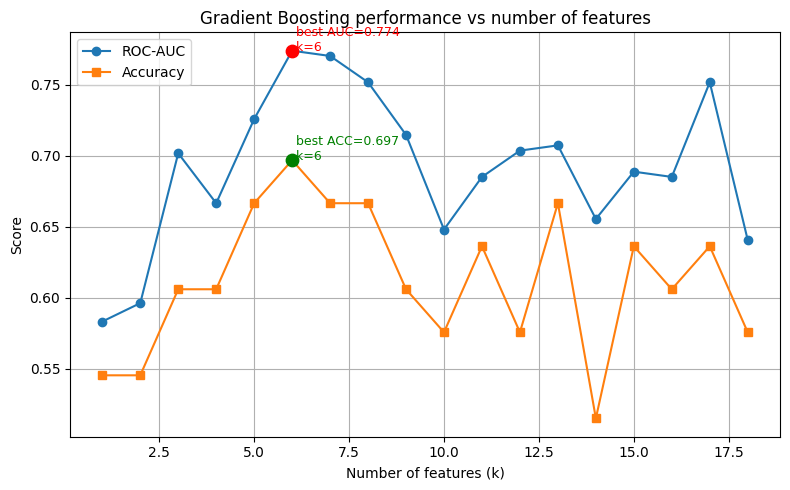

In [29]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

warnings.filterwarnings("ignore")

top_features = pd.read_csv("top_features_gradient.csv")
top_features = top_features[top_features["importance"] > 0]
top_features = top_features.sort_values("importance", ascending=False).reset_index(drop=True)
print(f"Total available features: {len(top_features)}")

k_values = list(range(1, len(top_features) + 1, 1))
results = []


param_dist = {
    "n_estimators": np.arange(50, 300, 50),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_split": [1,2, 3],
    "min_samples_leaf": [ 2, 3]
}


for k in k_values:
    print(f"\n=== Testing k = {k} features ===")
    selected = top_features.head(k)
    top_indices = selected["feature_index"].astype(int).tolist()

    X_train_k = X_train.iloc[:, top_indices]
    X_test_k = X_test.iloc[:, top_indices]



    gb = GradientBoostingClassifier(random_state=42)
    search = RandomizedSearchCV(
        estimator=gb,
        param_distributions=param_dist,
        n_iter=80,
        scoring="accuracy",
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    search.fit(X_train_k, y_train)

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_k)
    y_prob = best_model.predict_proba(X_test_k)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")

    results.append((k, acc, auc))

results_df = pd.DataFrame(results, columns=["k_features", "accuracy", "roc_auc"])

best_acc_row = results_df.iloc[results_df["accuracy"].idxmax()]
best_auc_row = results_df.iloc[results_df["roc_auc"].idxmax()]

print("\n=== Summary ===")
print(results_df)
print(f"\nBest Accuracy: {best_acc_row['accuracy']:.3f} at k = {int(best_acc_row['k_features'])}")
print(f"Best ROC-AUC: {best_auc_row['roc_auc']:.3f} at k = {int(best_auc_row['k_features'])}")


plt.figure(figsize=(8,5))
plt.plot(results_df["k_features"], results_df["roc_auc"], marker="o", label="ROC-AUC")
plt.plot(results_df["k_features"], results_df["accuracy"], marker="s", label="Accuracy")

best_auc_k = best_auc_row["k_features"]
best_acc_k = best_acc_row["k_features"]
plt.scatter(best_auc_k, best_auc_row["roc_auc"], color="red", s=80, zorder=5)
plt.scatter(best_acc_k, best_acc_row["accuracy"], color="green", s=80, zorder=5)
plt.text(best_auc_k, best_auc_row["roc_auc"], f" best AUC={best_auc_row['roc_auc']:.3f}\n k={int(best_auc_k)}",
         color="red", fontsize=9)
plt.text(best_acc_k, best_acc_row["accuracy"], f" best ACC={best_acc_row['accuracy']:.3f}\n k={int(best_acc_k)}",
         color="green", fontsize=9)

plt.xlabel("Number of features (k)")
plt.ylabel("Score")
plt.title("Gradient Boosting performance vs number of features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Shap GradientBoost

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


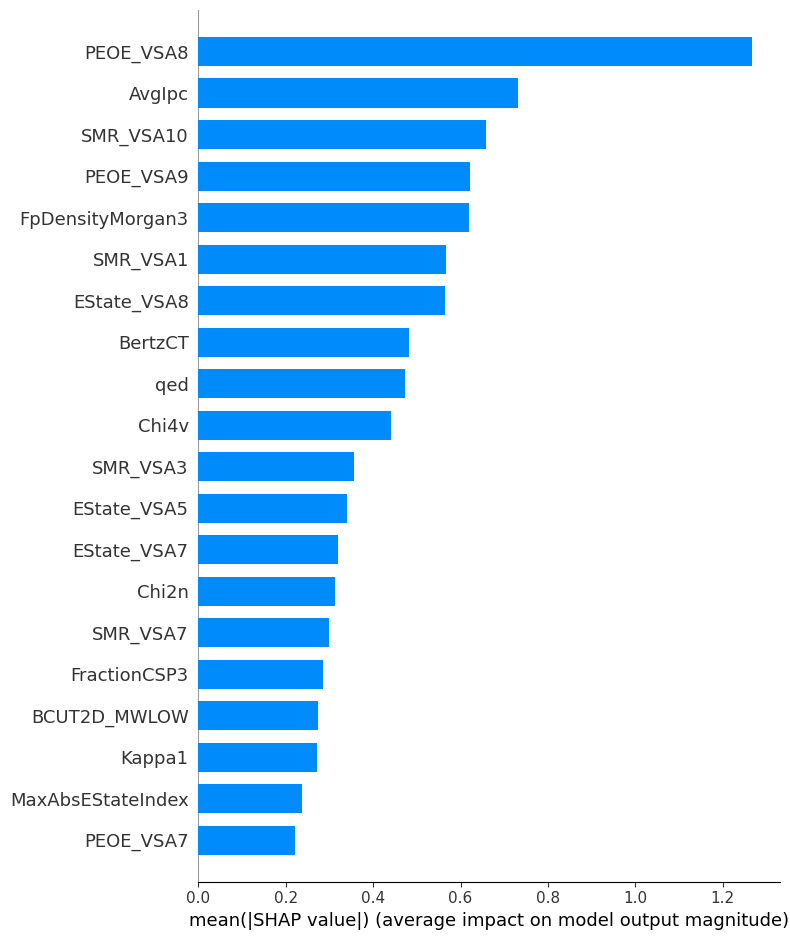

Accuracy: 0.636
ROC-AUC:  0.730


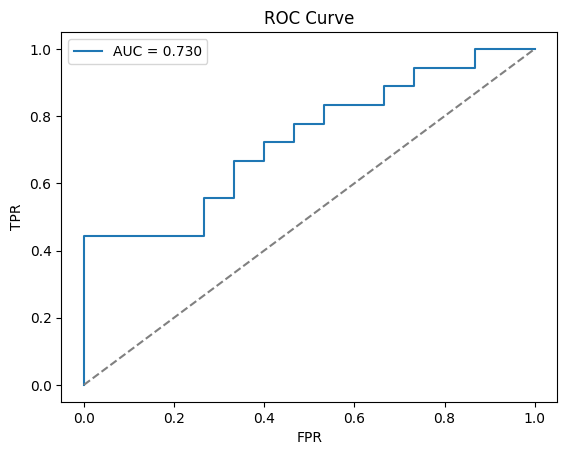

In [7]:
import shap

base_model = GradientBoostingClassifier(
    n_estimators=250,
    learning_rate=0.1,
    random_state=42
)
base_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(base_model)
shap_values = explainer.shap_values(X_train)
shap_importance = np.abs(shap_values).mean(axis=0)
feature_order = np.argsort(shap_importance)[::-1]
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=20)

y_pred = base_model.predict(X_test)
y_prob = base_model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_prob):.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(); plt.show()



=== Testing top-5 SHAP features ===
Best params: {'subsample': 0.6, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate': 0.01}
Accuracy: 0.636 | ROC-AUC: 0.704

=== Testing top-6 SHAP features ===
Best params: {'subsample': 0.6, 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.2}
Accuracy: 0.545 | ROC-AUC: 0.570

=== Testing top-7 SHAP features ===
Best params: {'subsample': 1.0, 'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 2, 'learning_rate': 0.2}
Accuracy: 0.545 | ROC-AUC: 0.648

=== Testing top-8 SHAP features ===
Best params: {'subsample': 0.8, 'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}
Accuracy: 0.485 | ROC-AUC: 0.630

=== Testing top-9 SHAP features ===
Best params: {'subsample': 0.8, 'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate

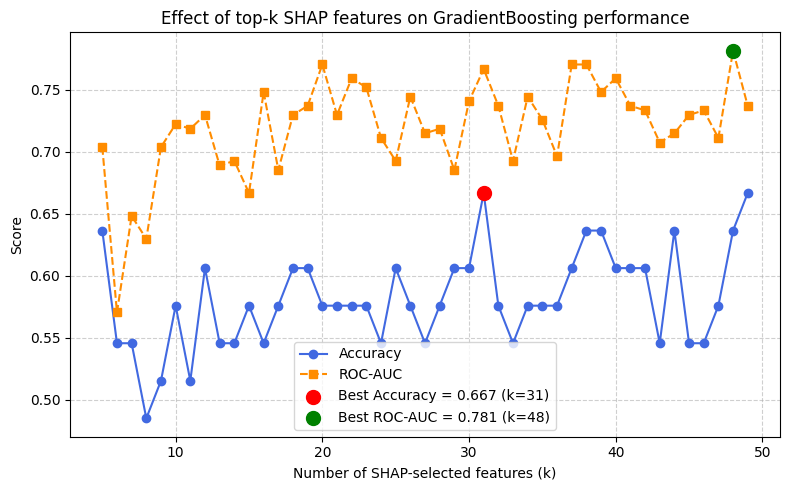


Best Accuracy = 0.667 at k = 31
Best ROC-AUC  = 0.781 at k = 48


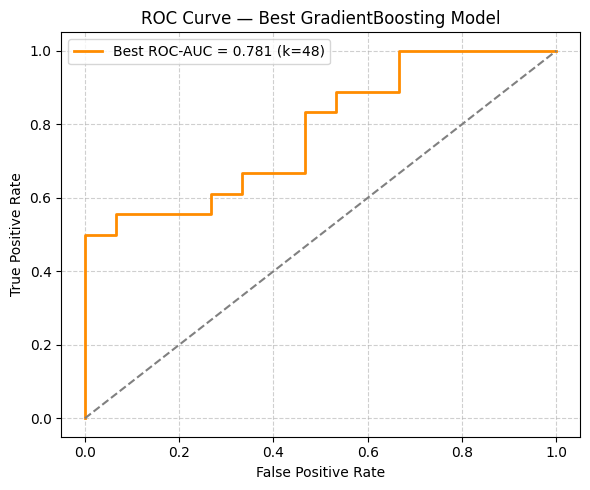

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

k_values = list(range(5, 50, 1))
results = []
models = []  

for k in k_values:
    print(f"\n=== Testing top-{k} SHAP features ===")
    selected_idx = feature_order[:k]
    X_train_sel = X_train.to_numpy()[:, selected_idx]
    X_test_sel = X_test.to_numpy()[:, selected_idx]

    model = GradientBoostingClassifier(random_state=42)
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=40,
        scoring='roc_auc',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    search.fit(X_train_sel, y_train)
    best_model = search.best_estimator_
    models.append(best_model)

    y_pred = best_model.predict(X_test_sel)
    y_prob = best_model.predict_proba(X_test_sel)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))

    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")


results = np.array(results)
feature_counts = results[:, 0]
accuracies = results[:, 1]
auc_scores = results[:, 2]

best_acc_idx = np.argmax(accuracies)
best_auc_idx = np.argmax(auc_scores)

best_k_acc = int(feature_counts[best_acc_idx])
best_acc = accuracies[best_acc_idx]

best_k_auc = int(feature_counts[best_auc_idx])
best_auc = auc_scores[best_auc_idx]


plt.figure(figsize=(8,5))
plt.plot(feature_counts, accuracies, 'o-', color='royalblue', label='Accuracy')
plt.plot(feature_counts, auc_scores, 's--', color='darkorange', label='ROC-AUC')

plt.scatter(best_k_acc, best_acc, color='red', s=100, zorder=5,
            label=f'Best Accuracy = {best_acc:.3f} (k={best_k_acc})')
plt.scatter(best_k_auc, best_auc, color='green', s=100, zorder=5,
            label=f'Best ROC-AUC = {best_auc:.3f} (k={best_k_auc})')

plt.title('Effect of top-k SHAP features on GradientBoosting performance')
plt.xlabel('Number of SHAP-selected features (k)')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nBest Accuracy = {best_acc:.3f} at k = {best_k_acc}")
print(f"Best ROC-AUC  = {best_auc:.3f} at k = {best_k_auc}")

best_model_auc = models[best_auc_idx]
selected_idx_auc = feature_order[:best_k_auc]

X_test_best = X_test.to_numpy()[:, selected_idx_auc]
y_prob_best = best_model_auc.predict_proba(X_test_best)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_best)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Best ROC-AUC = {best_auc:.3f} (k={best_k_auc})')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Best GradientBoosting Model')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
